<h3 style='text-align: center;'>Lets Grow More</h3>
<h1 align="center">Prediction Using Decision Tree Algorithm</h1> 
<div style="text-align: right">Created<br>
-- by Ruhit Debnath<br>
-- for Lets Grow More<br>
-- May, 2023</div>

In [1]:
# Installing required libraries

!pip install pydotplus
!apt install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [2]:
# Required modues

import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import Image
from matplotlib import pyplot as plt

from sklearn.externals.six import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# Some Configurations

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

## Loading the data

In [4]:
# Loading the data

iris = pd.read_csv('./Iris.csv', index_col=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [5]:
# Inspecting the data

iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


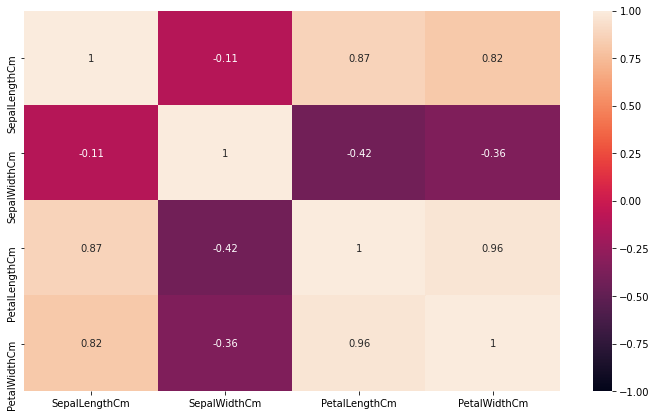

In [6]:
# Correlation matrix

sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf1ed8c690>,
      dtype=object)

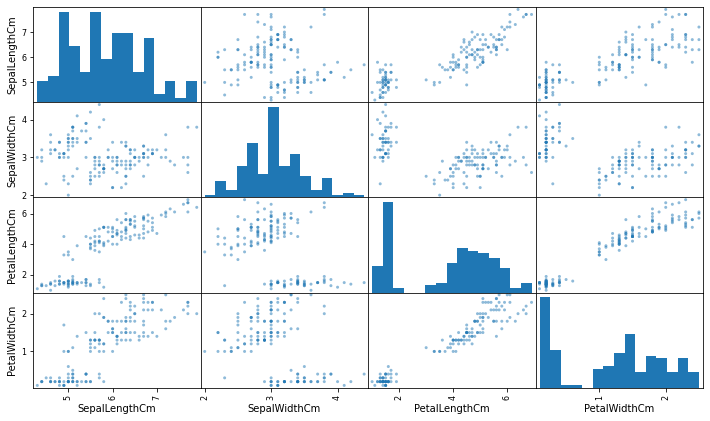

In [7]:
# Visualizing the pair plot

pd.plotting.scatter_matrix(iris, hist_kwds={'bins': 15})

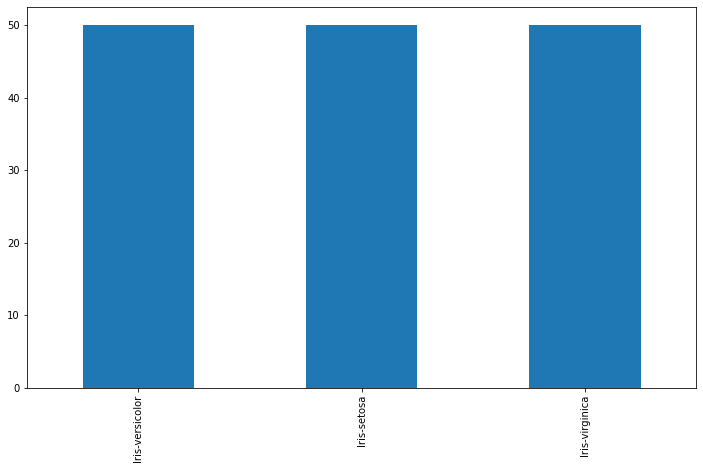

In [8]:
# Distribution of Species

iris['Species'].value_counts().plot(kind='bar')

## Data Preparation

In [9]:
# Separating out features and labels

X = iris.loc[:, iris.columns != 'Species'].values
y = iris['Species']

In [10]:
# Scaling the data

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

## Fitting the model

In [11]:
# Fitting the model

dtree = DecisionTreeClassifier()
dtree.fit(X_scaled, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Plot the Decision Tree

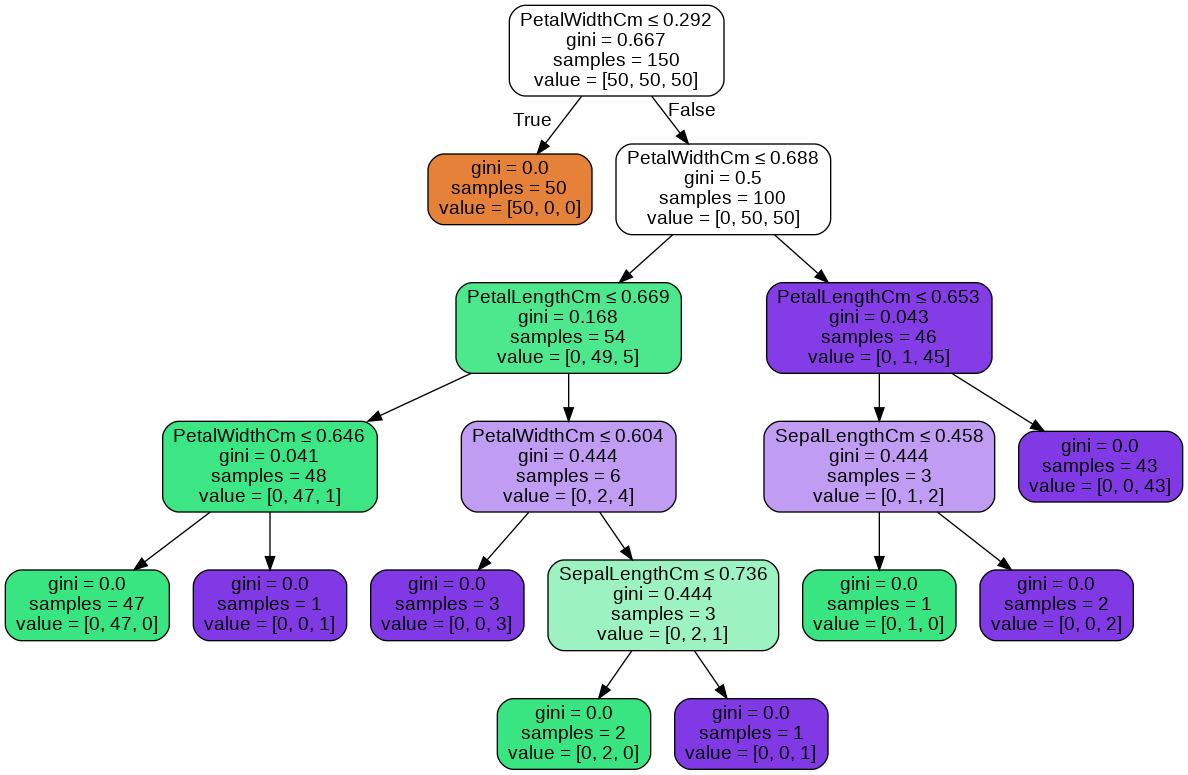

In [12]:
# Visualize the graph

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.columns[iris.columns != 'Species'],
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [13]:
# Prediction using new data point

new_point = np.array([4.3, 3.2, 1.2, 0.38]).reshape(1, 4)

pred = dtree.predict(new_point)
np.squeeze(pred)

array('Iris-virginica', dtype=object)